In [1]:
import numpy as np
from Bio import SeqIO
filename = 'data/2020-04-16/gisaid_cov2020.human_bat.ali.fasta'

samples = list(SeqIO.parse(filename, "fasta"))
num_samples = len(samples)

num_filtered = 0
sample_ids = []
sample_dates = []
    
for sample in samples:
    #print(sample.id)
    _, sample_name, sample_date = sample.id.split("|")
    sample_date = sample_date.replace("-", "")
    
    # Filter out if the date is incomplete or before 20191224
    if len(sample_date)==8 and int(sample_date)>=20191212:
        sample_ids.append(sample_name)
        sample_dates.append(int(sample_date))
    else:
        print("Sample is filtered: ", sample_name, sample_date, sample.id)
        num_filtered = num_filtered + 1
num_samples = len(sample_dates)     
    
print("\nNumber of filtered samples: ", num_filtered)
print("\nRemaining number of samples: ", num_samples)

# Sort w.r.t dates in increasing order
print("\nSorting the dates")
sorted_idx = np.argsort(sample_dates)
sample_dates = np.array(sample_dates)[sorted_idx]
sample_ids = np.array(sample_ids)[sorted_idx]

for id_ in range(30):
    print(sample_dates[id_], "\t", sample_ids[id_])

Sample is filtered:  EPI_ISL_419707 2020 hCoV-19/Spain/Cataluna201397/2020|EPI_ISL_419707|2020
Sample is filtered:  EPI_ISL_413585 2020 hCoV-19/Netherlands/Tilburg_/2020|EPI_ISL_413585|2020
Sample is filtered:  EPI_ISL_424248 202003 hCoV-19/USA/UNKNOWN-UW-1773/2020|EPI_ISL_424248|2020-03
Sample is filtered:  EPI_ISL_413711 202002 hCoV-19/China/WF0014/2020|EPI_ISL_413711|2020-02
Sample is filtered:  EPI_ISL_420850 202003 hCoV-19/DRC/352/2020|EPI_ISL_420850|2020-03
Sample is filtered:  EPI_ISL_420848 202003 hCoV-19/DRC/445/2020|EPI_ISL_420848|2020-03
Sample is filtered:  EPI_ISL_420844 202003 hCoV-19/DRC/355/2020|EPI_ISL_420844|2020-03
Sample is filtered:  EPI_ISL_420846 202003 hCoV-19/DRC/400/2020|EPI_ISL_420846|2020-03
Sample is filtered:  EPI_ISL_420843 202003 hCoV-19/DRC/353/2020|EPI_ISL_420843|2020-03
Sample is filtered:  EPI_ISL_420842 202003 hCoV-19/DRC/307/2020|EPI_ISL_420842|2020-03
Sample is filtered:  EPI_ISL_423023 202003 hCoV-19/USA/UNKNOWN-UW-1449/2020|EPI_ISL_423023|2020-0

In [2]:
date_keys = sorted(np.unique(sample_dates))
date_occurrence = np.zeros(len(date_keys)).astype(int)

for date in sample_dates:
    pos = date_keys.index(date)
    date_occurrence[pos] = date_occurrence[pos] + 1
    
for i in range(len(date_keys)):
    print(date_keys[i], date_occurrence[i])

20191224 1
20191226 1
20191230 11
20191231 2
20200101 3
20200102 1
20200105 1
20200108 3
20200110 1
20200111 3
20200113 4
20200115 3
20200116 3
20200117 4
20200118 5
20200119 3
20200120 4
20200121 14
20200122 16
20200123 15
20200124 12
20200125 18
20200126 6
20200127 8
20200128 16
20200129 24
20200130 26
20200131 12
20200201 27
20200202 22
20200203 10
20200204 12
20200205 19
20200206 12
20200207 10
20200208 13
20200209 14
20200210 14
20200211 6
20200212 4
20200213 5
20200214 2
20200215 17
20200216 19
20200217 36
20200218 3
20200219 4
20200220 11
20200221 6
20200222 6
20200223 8
20200224 15
20200225 20
20200226 25
20200227 42
20200228 64
20200229 52
20200301 70
20200302 108
20200303 113
20200304 122
20200305 127
20200306 127
20200307 75
20200308 98
20200309 141
20200310 159
20200311 173
20200312 184
20200313 235
20200314 168
20200315 147
20200316 238
20200317 355
20200318 422
20200319 350
20200320 362
20200321 260
20200322 242
20200323 367
20200324 326
20200325 276
20200326 179
20200327

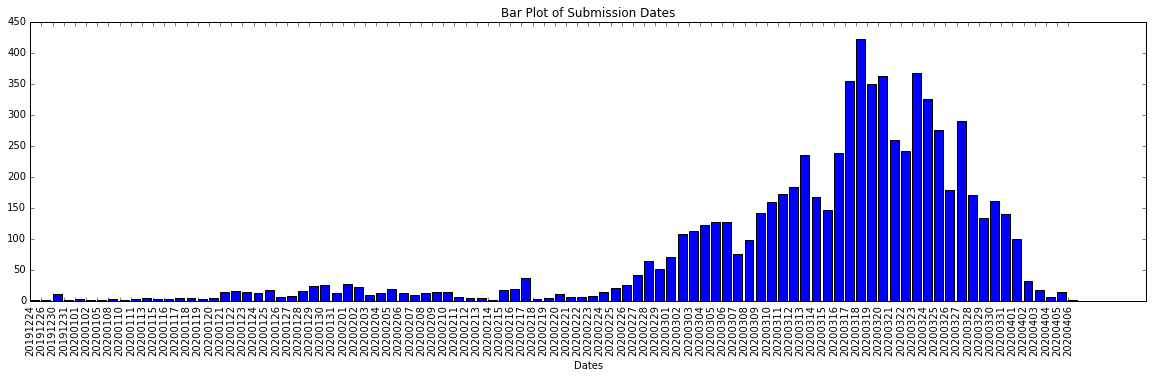

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 5))
plt.bar(np.arange(len(date_occurrence)), date_occurrence)
plt.title("Bar Plot of Submission Dates")
plt.xlabel("Dates")
plt.xticks(np.arange(len(date_occurrence)), date_keys, rotation=90)
plt.show()

In [4]:
len(date_occurrence)

94

In [24]:
date_keys.index(20191224)

0

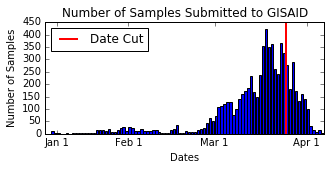

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5, 2))
plt.bar(np.arange(len(date_occurrence)), date_occurrence)
plt.axvline(81, 0, 1, label='Date Cut', color='r', linewidth=2)
plt.title("Number of Samples Submitted to GISAID")
plt.xlabel("Dates")
plt.ylabel("Number of Samples")
plt.xlim([0, len(date_occurrence)])
#plt.xticks(np.arange(len(date_occurrence)), date_keys, rotation=90)
plt.xticks([4,28,57,88], ['Jan 1', 'Feb 1', 'Mar 1', 'Apr 1'])
plt.legend(loc='upper left')
plt.show()

In [4]:
date_occurrence

array([  1,   1,  11,   2,   3,   1,   1,   3,   1,   3,   4,   3,   3,
         4,   5,   3,   4,  14,  16,  15,  12,  18,   6,   8,  16,  24,
        26,  12,  27,  22,  10,  12,  19,  12,  10,  13,  14,  14,   6,
         4,   5,   2,  17,  19,  36,   3,   4,  11,   6,   6,   8,  15,
        20,  25,  42,  64,  52,  70, 108, 113, 122, 127, 127,  75,  98,
       141, 159, 173, 184, 235, 168, 147, 238, 355, 422, 350, 362, 260,
       242, 367, 326, 276, 179, 290, 171, 133, 161, 140, 100,  32,  17,
         6,  14,   2])

In [5]:
date_cumulative = np.cumsum(date_occurrence)
date_cumulative

array([   1,    2,   13,   15,   18,   19,   20,   23,   24,   27,   31,
         34,   37,   41,   46,   49,   53,   67,   83,   98,  110,  128,
        134,  142,  158,  182,  208,  220,  247,  269,  279,  291,  310,
        322,  332,  345,  359,  373,  379,  383,  388,  390,  407,  426,
        462,  465,  469,  480,  486,  492,  500,  515,  535,  560,  602,
        666,  718,  788,  896, 1009, 1131, 1258, 1385, 1460, 1558, 1699,
       1858, 2031, 2215, 2450, 2618, 2765, 3003, 3358, 3780, 4130, 4492,
       4752, 4994, 5361, 5687, 5963, 6142, 6432, 6603, 6736, 6897, 7037,
       7137, 7169, 7186, 7192, 7206, 7208])

In [6]:
train_perc = 0.8
cut_idx = np.where(date_cumulative>=train_perc*num_samples)[0][0]
print("Index to separate train and test sets: ", cut_idx, "\tDate: ", date_keys[cut_idx], "\tCount: ", date_cumulative[cut_idx])

Index to separate train and test sets:  81 	Date:  20200325 	Count:  5963


In [7]:
date_cut = date_keys[cut_idx]

train_samples = {}
test_samples = {}

for sample in samples:
    _, sample_name, sample_date = sample.id.split("|")
    sample_date = sample_date.replace("-", "")
    
    # Filter out if the date is incomplete or before 20191224
    if len(sample_date)==8 and int(sample_date)>=20191212:
        
        # Decide if train or test
        if int(sample_date) <= date_cut:
            train_samples[sample_name] = sample.seq
        else:
            test_samples[sample_name] = sample.seq

num_training = len(list(train_samples.keys()))
num_test = len(list(test_samples.keys()))
print("\nNumber of training samples: \t", num_training)
print("Number of test samples: \t", num_test)


Number of training samples: 	 5963
Number of test samples: 	 1245


In [8]:
def seq_one_hot(sequence, characters):
    """One-hot encode a sequence of characters. Each column is one character."""
    # Create dictionary linking characters to indices
    char_to_ind = dict(zip(characters, range(len(characters))))
    # Set up matrix of zeros
    M = np.zeros((len(characters),len(sequence)))
    # Iterate over tuples of character index and sequence index
    for i in zip([char_to_ind[c[0]] for c in sequence], range(len(sequence))):
        # Set cell corresponding to character to one
        M[i[0],i[1]] = 1
    # Return finished one-hot encoding
    return M

In [20]:
def seq_no_hot(sequence, characters):
    """One-hot encode a sequence of characters. Each column is one character."""
    # Create dictionary linking characters to indices
    char_to_ind = dict(zip(characters, range(len(characters))))
    # Set up matrix of zeros
    M = np.zeros((1,len(sequence)))
    # Iterate over tuples of character index and sequence index
    for i in zip([char_to_ind[c[0]] for c in sequence], range(len(sequence))):
        # Set cell corresponding to character to one
        M[0,i[1]] = i[0]
    # Return finished one-hot encoding
    return M

In [21]:
test_matrix = np.zeros((num_test-420, 6, 39178))
test_matrix_nohot = np.zeros((num_test-420, 1, 39178))
test_samples_idx = []
c=0
i = 0
key_list = list(test_samples.keys())
for name in key_list:
    try:
        test_samples_idx.append(name)
        test_matrix[i,:,:] = seq_one_hot(test_samples[name], characters=['a', 'c', 'g', 't', '-', 'n'])
        test_matrix_nohot[i,:,:] = seq_no_hot(test_samples[name], characters=['a', 'c', 'g', 't', '-', 'n'])
        i=i+1
    except:
        c = c+1
        #print("Passing sample", name)
print("\nSkipped: ", c)


Skipped:  420


In [22]:
test_matrix_nohot[2,:,2000:2050]

array([[ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
         4.,  4.,  4.,  2.,  0.,  1.,  1.,  3.,  3.,  1.,  3.,  0.,  2.,
         1.,  0.,  1.,  2.,  3.,  2.,  1.,  3.,  4.,  4.,  4.,  4.,  4.,
         4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.]])

In [25]:
test_matrix[2,0,2000:2050]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [30]:
test_matrix = test_matrix.astype(int)
np.save('data/temporal_test_mat_nohot_20000_12000.npy', test_matrix_nohot[:,:,2000:12000])
np.save('data/temporal_test_mat.npy_20000_12000', test_matrix[:,:,2000:12000])
np.save('data/temporal_test_ids.npy_20000_12000', np.array(test_samples_idx))

In [26]:
np.save('data/temporal_test_mat_nohot.npy', test_matrix_nohot[:,:,2000:7000])

In [28]:
train_matrix = np.zeros((num_training-1079, 6, 39178))
train_matrix_nohot = np.zeros((num_training-1079, 1, 39178))
train_samples_idx = []
c=0
i = 0
key_list = list(train_samples.keys())
for name in key_list:
    try:
        train_samples_idx.append(name)
        train_matrix[i,:,:] = seq_one_hot(train_samples[name], characters=['a', 'c', 'g', 't', '-', 'n'])
        train_matrix_nohot[i,:,:] = seq_no_hot(train_samples[name], characters=['a', 'c', 'g', 't', '-', 'n'])
        i=i+1
    except:
        c = c+1
        #print("Passing sample", name)
print("\nSkipped: ", c)


Skipped:  1079


In [31]:
train_matrix = train_matrix.astype(int)
np.save('data/temporal_train_mat_nohot_20000_12000.npy', train_matrix_nohot[:,:,2000:12000])
np.save('data/temporal_train_mat.npy_20000_12000', train_matrix[:,:,2000:12000])
np.save('data/temporal_train_ids.npy_20000_12000', np.array(train_samples_idx))

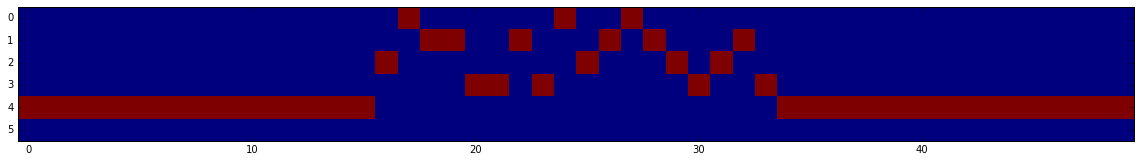

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,5))
plt.imshow(train_matrix[0,:,2000:2050], interpolation='nearest')
plt.show()